### Rede Neural com TensorFlow Para Classificação de Imagens de Roupas usando Deep Learning

####  <font color="green">Para esse mini projeto, foram utilizados os materiais de apoio da Escola Sgmoidal e DSA Academy.</font>

<font color="black">Os dados serão obtidos a partir do <font color="blue">Fashion MNIST</font>, um extenso banco de dados de imagens de moda amplamente disponível de forma gratuita. Esse conjunto de dados é frequentemente utilizado para o treinamento e teste de diversos sistemas de aprendizado de máquina</font>

Será construido uma rede neural artificial com TensorFlow para classificação de imagens de roupas e acessórios

<Left>
    <img src = "FashionMNIST.jpg" alt= "FashionMNIST")
</Left>

In [108]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.4


## Instalando e Carregando os Pacotes

In [109]:
!pip install -q -U watermark

In [110]:
# Imports das Blibliotecas
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import classification_report
np.random.seed(42)
tf.random.set_seed(42)

# Configuração dos gráficos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%config InlineBackend.figure_format = 'svg'
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)



In [111]:
# Definição dos diretórios onde serão salvas as imagens
PROJECT_ROOT_DIR = "."
PROJECT_NUM = "TensorFlow"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "dados", PROJECT_NUM)
os.makedirs(IMAGES_PATH, exist_ok = True)

In [112]:
# Versões dos pacotes utilizados neste notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib: 3.7.1
tensorflow: 2.14.0
seaborn   : 0.12.2
numpy     : 1.24.3
pandas    : 1.5.3
keras     : 2.14.0



## Carregando e Preparando os Dados

In [113]:
# Carregando o dataset
fashion_mnist = keras.datasets.fashion_mnist

In [114]:
# Extraindo os dados de treino e de teste
(X_treino_full, y_treino_full), (X_teste, y_teste) = fashion_mnist.load_data()

## Exploração dos Dados

### A dimensionalidade dos dataframes do conjunto de treino contém 60.000 imagens em escala de cinza e o de Teste 10.000, cada uma com 28x28 pixels, conforme apresentado abaixo pelo comando shape:

In [115]:
# Verificando a dimensionalidade dos DataFrames
print(" As Dimensionalidade são: ")
print( "X_treino_full:",X_treino_full.shape)
print( "X_teste:",X_treino_full.shape)


 As Dimensionalidade são: 
X_treino_full: (60000, 28, 28)
X_teste: (60000, 28, 28)


In [116]:
# ver uma fatia de uma imagem
print("\n\nImagem convertida em array:\n", X_treino_full[0][:5][:5])



Imagem convertida em array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]]


In [117]:
# Tipo de dados
X_treino_full.dtype

dtype('uint8')

Protando uma imagem usando a função imshow () do Matplotlib, com um mapa de cores binary.

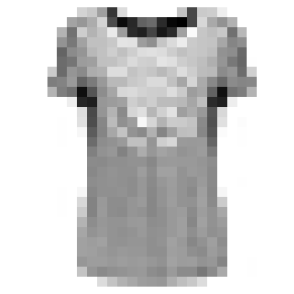

In [120]:
# Plot de uma imagem
plt.imshow(X_treino[1], cmap = "binary")
plt.axis('off')
plt.show()

In [121]:
# Nomes das classes
classes = ["T-shirt/top", 
                 "Trouser", 
                 "Pullover", 
                 "Dress", 
                 "Coat", 
                 "Sandal", 
                 "Shirt", 
                 "Sneaker", 
                 "Bag", 
                 "Ankle boot"]

In [122]:
# Nome de classe
classes[y_treino[1]]

'T-shirt/top'

In [123]:
# verificar os valores únicos por classes (treino)
print("y_treino:")
np.unique(y_treino, return_counts=True)

y_treino:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5543, 5444, 5496, 5499, 5512, 5507, 5507, 5488, 5510, 5494],
       dtype=int64))

In [124]:
# verificar os valores únicos por classes (teste)
print("y_test:")
np.unique(y_teste, return_counts=True)
     

y_test:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

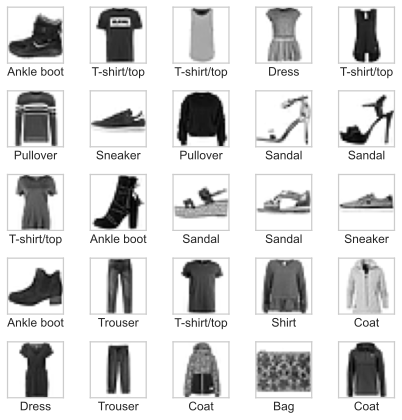

In [125]:
# ver algumas imagens de exemplo
plt.figure(figsize=(6,6))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_treino_full[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_treino_full[i]])
plt.tight_layout()
     

Verificando amostras das imagens no conjunto de dados:

In [126]:
# Função para salvar as imagens
def salva_imagem(fig_id, tight_layout = True, fig_extension = "png", resolution = 300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Salvando a imagem...", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)

Salvando a imagem... plot_fashion_mnist


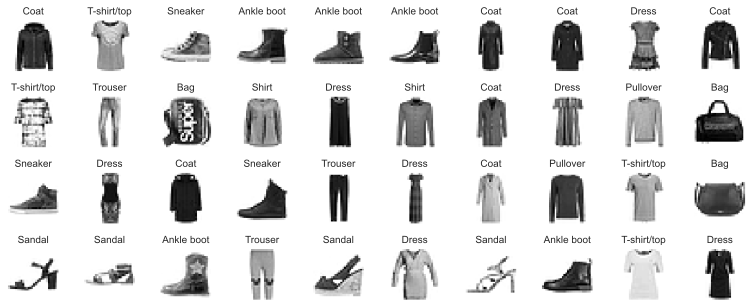

In [127]:
# Plot de algumas imagens

# Vamos plotar 4 linhas e 10 coluns
n_rows = 4
n_cols = 10

# Área de plotagem
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

# Loop pelas linhas e colunas
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_treino[index], cmap = "binary", interpolation = "nearest")
        plt.axis('off')
        plt.title(classes[y_treino[index]], fontsize = 10)

# Ajusta os plots
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

# Salva a imagem em disco
salva_imagem('plot_fashion_mnist', tight_layout = False)

# Mostra a imagem
plt.show()

## Pré-Processamento dos Dados

### Normalizar os pixels

Será divido o conjunto de treinamento completo para um conjunto de validação e um conjunto de treinamento (menor). 
Ainda será efetuada a dimensionalidade das intensidades de pixel para o intervalo de 0-1 (padronização) e será convertida em float, dividindo por 255.

As intensidades dos pixels devem ser normalizadas, Ou seja, os valores inteiros devem ser convertidos no tipo float e ficar dentro do intervalo de [0,1].

Aqui, como o valor máximo do pixel é 255, basta fazer a divisão de todos pixels individuais por 255.0 e eles estarão normalizados e do tipo float.

In [128]:
# Preparação dos dados
X_valid, X_treino = X_treino_full[:3000] / 255., X_treino_full[5000:] / 255.
y_valid, y_treino =  y_treino_full[:3000], y_treino_full[5000:]
X_teste = X_teste / 255.0

In [129]:
# Shape
print(" As Dimensionalidade são: ")
print( "X_treino_full:",X_treino_full.shape)
print( "X_valid:",X_valid.shape)
print( "X_teste:",X_teste.shape)
print( "y_valid:",X_valid.shape)


 As Dimensionalidade são: 
X_treino_full: (60000, 28, 28)
X_valid: (3000, 28, 28)
X_teste: (10000, 28, 28)
y_valid: (3000, 28, 28)


In [130]:
# Modelo de Rede Neural com 2 Camadas Densas

# Cria o objeto do tipo sequência
modelo = keras.models.Sequential()

# Camada para receber os dados de entrada
modelo.add(keras.layers.Flatten(input_shape = [28, 28]))

# Primeira camada oculta com ativação relu
modelo.add(keras.layers.Dense(300, activation = "relu"))

# Segunda camada oculta com ativação relu
modelo.add(keras.layers.Dense(100, activation = "relu"))

# Camada de saída com ativação softmax
# Teremos uma probabilidade prevista para cada classe
modelo.add(keras.layers.Dense(10, activation = "softmax"))

In [131]:
# Limpamos a sessão Keras e 
keras.backend.clear_session()

In [132]:
# Camadas do modelo
modelo.layers

In [133]:
# Sumário do modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [134]:
# Vamos criar um plot com o modelo completo e salvar a imagem em disco
keras.utils.plot_model(modelo, IMAGES_PATH + "/modelo_fashion_mnist.png", show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [135]:
# Vamos nomear a primeira camada oculta do modelo
hidden1 = modelo.layers[1]
hidden1.name

'dense'

In [136]:
# Verificamos se a camada com novo nome existe
modelo.get_layer(hidden1.name) is hidden1

True

In [137]:
# Extraímos pesos e bias da primeira camada oculta
weights, biases = hidden1.get_weights()

In [138]:
# Pesos que serão usados no começo do treinamento e são gerados de forma aleatória pelo Keras/TensorFlow
weights

array([[-0.00910236, -0.06372909,  0.04642431, ..., -0.02741902,
        -0.06060429, -0.02764173],
       [ 0.07396626,  0.021989  ,  0.03150014, ..., -0.03293093,
         0.0391931 , -0.03697507],
       [ 0.01515631, -0.02166597, -0.00461105, ..., -0.06154569,
        -0.02809722,  0.06084873],
       ...,
       [-0.0172222 , -0.04353958,  0.00276391, ..., -0.06364512,
         0.05044758, -0.03821353],
       [ 0.05461425, -0.04041521,  0.07307556, ...,  0.02654399,
         0.00173799,  0.05548358],
       [ 0.04660089,  0.04189138, -0.04963511, ..., -0.00916158,
         0.07380602,  0.0718362 ]], dtype=float32)

In [139]:
# Shape
weights.shape

(784, 300)

In [140]:
# Bias que serão usados no começo do treinamento
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [141]:
# Shape
biases.shape

(300,)

In [142]:
# Agora compilamos o modelo com o otimizador, função de custo e a métrica
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy
modelo.compile(optimizer = "sgd", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

Podemos então treinar o modelo.

In [143]:
# Treinamento
history = modelo.fit(X_treino, 
                     y_treino, 
                     epochs = 50, 
                     validation_data = (X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7298 - accuracy: 0.7619 - val_loss: 0.5512 - val_accuracy: 0.8147
Epoch 2/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4961 - accuracy: 0.8254 - val_loss: 0.4552 - val_accuracy: 0.8440
Epoch 3/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4483 - accuracy: 0.8421 - val_loss: 0.5517 - val_accuracy: 0.7943
Epoch 4/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4201 - accuracy: 0.8529 - val_loss: 0.4099 - val_accuracy: 0.8627
Epoch 5/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4011 - accuracy: 0.8597 - val_loss: 0.3924 - val_accuracy: 0.8663
Epoch 6/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3814 - accuracy: 0.8653 - val_loss: 0.3887 - val_accuracy: 0.8670
Epoch 7/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3688 - accuracy: 0.8698 - val_loss: 0.3836 - val_accuracy:

In [144]:
# Hiperparâmetros do modelo
history.params

{'verbose': 1, 'epochs': 50, 'steps': 1719}

In [145]:
# Aqui estão as métricas disponíveis após o treinamento (erro e acurácia)
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Salvando a imagem... plot_keras_learning_curves


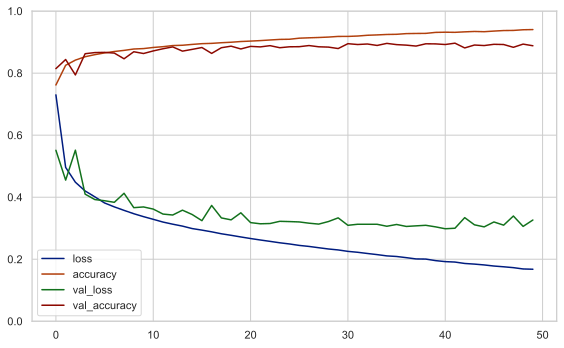

In [146]:
# Colocamos o histórico de treinamento em um dataframe, plotamos e salvamos a figura
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
salva_imagem("plot_keras_learning_curves")
plt.show()

### Avaliando o Modelo
### Depois de treinar, testamos o modelo com dados de teste.

In [147]:
# Avalia o modelo
modelo.evaluate(X_teste, y_teste)

313/313 [==============================] - 1s 3ms/step - loss: 0.3486 - accuracy: 0.8840


[0.34855762124061584, 0.8840000033378601]

In [148]:
# Vamos extrair 5 imagens de teste
X_new = X_teste[:5]

In [149]:
# E então prever a probabilidade de cada classe para cada imagem
y_proba = modelo.predict(X_new)

1/1 [==============================] - 0s 162ms/step


In [150]:
# Previsões de probabilidade
y_proba

array([[3.36761268e-08, 1.38933189e-07, 1.76411163e-06, 8.37883078e-07,
        3.16718706e-06, 4.99616261e-04, 3.88481538e-07, 2.64145806e-03,
        1.23104073e-05, 9.96840239e-01],
       [3.86014872e-05, 2.67191297e-10, 9.99580681e-01, 7.99813016e-09,
        3.70738097e-04, 1.39648655e-12, 1.00680036e-05, 2.94199665e-11,
        8.36600372e-11, 2.96588552e-11],
       [1.11153874e-07, 9.99999762e-01, 2.43084242e-09, 6.22983052e-08,
        2.38667948e-08, 1.36726523e-15, 2.42640699e-11, 6.36470867e-12,
        4.64003447e-10, 4.61825402e-13],
       [1.06714242e-06, 9.99987841e-01, 3.64425112e-08, 1.08042150e-05,
        1.45127402e-07, 3.56907104e-12, 6.20877971e-09, 3.06199954e-10,
        1.46080870e-10, 1.18199506e-10],
       [1.73739240e-01, 5.22960818e-07, 9.65753850e-03, 2.71336222e-03,
        1.21502846e-03, 5.43121210e-08, 8.12669516e-01, 1.19550791e-07,
        9.25714403e-07, 3.69319105e-06]], dtype=float32)

In [155]:
# As previsões de classes são mais fáceis de interpretar
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.17, 0.  , 0.01, 0.  , 0.  , 0.  , 0.81, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [158]:
# Vamos gravar as previsões das 5 imagens
y_pred = modelo.predict(X_new)
y_pred

1/1 [==============================] - 0s 21ms/step


array([[3.36761268e-08, 1.38933189e-07, 1.76411163e-06, 8.37883078e-07,
        3.16718706e-06, 4.99616261e-04, 3.88481538e-07, 2.64145806e-03,
        1.23104073e-05, 9.96840239e-01],
       [3.86014872e-05, 2.67191297e-10, 9.99580681e-01, 7.99813016e-09,
        3.70738097e-04, 1.39648655e-12, 1.00680036e-05, 2.94199665e-11,
        8.36600372e-11, 2.96588552e-11],
       [1.11153874e-07, 9.99999762e-01, 2.43084242e-09, 6.22983052e-08,
        2.38667948e-08, 1.36726523e-15, 2.42640699e-11, 6.36470867e-12,
        4.64003447e-10, 4.61825402e-13],
       [1.06714242e-06, 9.99987841e-01, 3.64425112e-08, 1.08042150e-05,
        1.45127402e-07, 3.56907104e-12, 6.20877971e-09, 3.06199954e-10,
        1.46080870e-10, 1.18199506e-10],
       [1.73739240e-01, 5.22960818e-07, 9.65753850e-03, 2.71336222e-03,
        1.21502846e-03, 5.43121210e-08, 8.12669516e-01, 1.19550791e-07,
        9.25714403e-07, 3.69319105e-06]], dtype=float32)

In [163]:
y_pred_classes = y_pred.argmax(axis=-1)

Vamos plotar as previsões.

Salvando a imagem... plot_previsoes_fashion_mnist_images


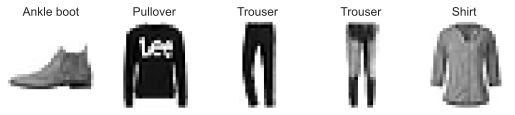

In [166]:
# Plot
plt.figure(figsize = (8, 5))
for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap = "binary", interpolation = "nearest")
    plt.axis('off')
    plt.title(classes[y_teste[index]], fontsize = 12)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
salva_imagem('plot_previsoes_fashion_mnist_images', tight_layout = False)
plt.show()

Previsões realizadas.